In [1]:
import sys
import os
sys.path.append('../src/')
from old_vega import VEGA
from pathway_sparse_vae import PathwaySparseVAE
from pathway_deep_decoder_vae import PathwayDeepDecoderVAE
from vanilla_vae import VanillaVAE
from utils import *
import torch
torch.manual_seed(0)
np.random.seed(0)
import pandas as pd
from sklearn.metrics import silhouette_score
import umap
import scanpy as sc
import numpy as np
import itertools
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['axes.linewidth'] = .5
matplotlib.rcParams['lines.linewidth'] = .5
matplotlib.rcParams['patch.linewidth'] = .5
import seaborn as sns
# Reload data
adata_train = sc.read('../data/kang_pbmc.h5ad')
# Reload pathway
pathway_dict = read_gmt('../data/reactomes.gmt')
n = 1
pathway_list = list(pathway_dict.keys())+['UNANNOTATED_'+str(k) for k in range(n)]
pathway_mask = create_pathway_mask(adata_train.var.index.tolist(), pathway_dict, add_missing=n, fully_connected=True)

/home/ubuntu/anaconda3/envs/torch_env/lib/python3.6/site-packages/anndata/compat/__init__.py:161: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  FutureWarning,
/home/ubuntu/anaconda3/envs/torch_env/lib/python3.6/site-packages/anndata/compat/__init__.py:161: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  FutureWarning,


In [2]:
# For deep encoder, shallow decoder
asw_dict_deep_e_shal_d = {'condition':[], 'ct_ctrl':[], 'ct_stim':[]}
path_models = '../trained_models/compare_models/'
model_handle = 'vega_fold'
list_folds = [f for f in os.listdir(path_models) if model_handle in f]
for m in list_folds:
    torch.manual_seed(0)
    np.random.seed(0)
    vae = VEGA(pathway_mask=pathway_mask)
    vae.load_state_dict(torch.load(path_models+m,map_location=torch.device('cpu')))
    vae.eval()
    X_cond = adata_train.X.A
    y_cond = adata_train.obs['condition']
    X_ct_ctrl = adata_train.X.A[adata_train.obs['condition']=='control',:]
    y_ct_ctrl = adata_train.obs['cell_type'][adata_train.obs['condition']=='control']
    X_ct_stim = adata_train.X.A[adata_train.obs['condition']=='stimulated',:]
    y_ct_stim = adata_train.obs['cell_type'][adata_train.obs['condition']=='stimulated']
    # Encode
    z_cond = vae.to_latent(torch.Tensor(X_cond)).detach().numpy()
    z_ct_ctrl = vae.to_latent(torch.Tensor(X_ct_ctrl)).detach().numpy()
    z_ct_stim = vae.to_latent(torch.Tensor(X_ct_stim)).detach().numpy()
    # Get silhouette scores
    asw_cond = silhouette_score(X=z_cond, labels=y_cond, random_state=42)
    asw_ct_ctrl = silhouette_score(X=z_ct_ctrl, labels=y_ct_ctrl, random_state=42)
    asw_ct_stim = silhouette_score(X=z_ct_stim, labels=y_ct_stim, random_state=42)
    # Append
    asw_dict_deep_e_shal_d['condition'].append(asw_cond)
    asw_dict_deep_e_shal_d['ct_ctrl'].append(asw_ct_ctrl)
    asw_dict_deep_e_shal_d['ct_stim'].append(asw_ct_stim)

0.5
Constraining decoder to positive weights
0.5
Constraining decoder to positive weights
0.5
Constraining decoder to positive weights
0.5
Constraining decoder to positive weights
0.5
Constraining decoder to positive weights
0.5
Constraining decoder to positive weights
0.5
Constraining decoder to positive weights
0.5
Constraining decoder to positive weights
0.5
Constraining decoder to positive weights
0.5
Constraining decoder to positive weights


In [3]:
# For deep encoder, shallow decoder
asw_dict_shal_e_shal_d = {'condition':[], 'ct_ctrl':[], 'ct_stim':[]}
path_models = '../trained_models/compare_models/'
model_handle = 'sparse_vae_fold'
list_folds = [f for f in os.listdir(path_models) if model_handle in f]
for m in list_folds:
    torch.manual_seed(0)
    np.random.seed(0)
    vae = PathwaySparseVAE(pathway_mask=pathway_mask)
    vae.load_state_dict(torch.load(path_models+m,map_location=torch.device('cpu')))
    vae.eval()
    X_cond = adata_train.X.A
    y_cond = adata_train.obs['condition']
    X_ct_ctrl = adata_train.X.A[adata_train.obs['condition']=='control',:]
    y_ct_ctrl = adata_train.obs['cell_type'][adata_train.obs['condition']=='control']
    X_ct_stim = adata_train.X.A[adata_train.obs['condition']=='stimulated',:]
    y_ct_stim = adata_train.obs['cell_type'][adata_train.obs['condition']=='stimulated']
    # Encode
    z_cond = vae.to_latent(torch.Tensor(X_cond)).detach().numpy()
    z_ct_ctrl = vae.to_latent(torch.Tensor(X_ct_ctrl)).detach().numpy()
    z_ct_stim = vae.to_latent(torch.Tensor(X_ct_stim)).detach().numpy()
    # Get silhouette scores
    asw_cond = silhouette_score(X=z_cond, labels=y_cond, random_state=42)
    asw_ct_ctrl = silhouette_score(X=z_ct_ctrl, labels=y_ct_ctrl, random_state=42)
    asw_ct_stim = silhouette_score(X=z_ct_stim, labels=y_ct_stim, random_state=42)
    # Append
    asw_dict_shal_e_shal_d['condition'].append(asw_cond)
    asw_dict_shal_e_shal_d['ct_ctrl'].append(asw_ct_ctrl)
    asw_dict_shal_e_shal_d['ct_stim'].append(asw_ct_stim)

0.5
VAE initialized with normal distribution
0.5
VAE initialized with normal distribution
0.5
VAE initialized with normal distribution
0.5
VAE initialized with normal distribution
0.5
VAE initialized with normal distribution
0.5
VAE initialized with normal distribution
0.5
VAE initialized with normal distribution
0.5
VAE initialized with normal distribution
0.5
VAE initialized with normal distribution
0.5
VAE initialized with normal distribution


In [4]:
# For shallow encoder, deep decoder
asw_dict_shal_e_deep_d = {'condition':[], 'ct_ctrl':[], 'ct_stim':[]}
path_models = '../trained_models/compare_models/'
model_handle = 'deep_decoder_fold'
list_folds = [f for f in os.listdir(path_models) if model_handle in f]
for m in list_folds:
    torch.manual_seed(0)
    np.random.seed(0)
    vae = PathwayDeepDecoderVAE(pathway_mask=pathway_mask)
    vae.load_state_dict(torch.load(path_models+m, map_location=torch.device('cpu')))
    vae.eval()
    X_cond = adata_train.X.A
    y_cond = adata_train.obs['condition']
    X_ct_ctrl = adata_train.X.A[adata_train.obs['condition']=='control',:]
    y_ct_ctrl = adata_train.obs['cell_type'][adata_train.obs['condition']=='control']
    X_ct_stim = adata_train.X.A[adata_train.obs['condition']=='stimulated',:]
    y_ct_stim = adata_train.obs['cell_type'][adata_train.obs['condition']=='stimulated']
    # Encode
    z_cond = vae.to_latent(torch.Tensor(X_cond)).detach().numpy()
    z_ct_ctrl = vae.to_latent(torch.Tensor(X_ct_ctrl)).detach().numpy()
    z_ct_stim = vae.to_latent(torch.Tensor(X_ct_stim)).detach().numpy()
    # Get silhouette scores
    asw_cond = silhouette_score(X=z_cond, labels=y_cond, random_state=42)
    asw_ct_ctrl = silhouette_score(X=z_ct_ctrl, labels=y_ct_ctrl, random_state=42)
    asw_ct_stim = silhouette_score(X=z_ct_stim, labels=y_ct_stim, random_state=42)
    # Append
    asw_dict_shal_e_deep_d['condition'].append(asw_cond)
    asw_dict_shal_e_deep_d['ct_ctrl'].append(asw_ct_ctrl)
    asw_dict_shal_e_deep_d['ct_stim'].append(asw_ct_stim)

0.5
Constraining encoder to positive weights
0.5
Constraining encoder to positive weights
0.5
Constraining encoder to positive weights
0.5
Constraining encoder to positive weights
0.5
Constraining encoder to positive weights
0.5
Constraining encoder to positive weights
0.5
Constraining encoder to positive weights
0.5
Constraining encoder to positive weights
0.5
Constraining encoder to positive weights
0.5
Constraining encoder to positive weights


In [5]:
# For vanilla VAE
asw_dict_deep_e_deep_d = {'condition':[], 'ct_ctrl':[], 'ct_stim':[]}
path_models = '../trained_models/compare_models/'
model_handle = 'vanilla_vae_fold'
list_folds = [f for f in os.listdir(path_models) if model_handle in f]
for m in list_folds:
    torch.manual_seed(0)
    np.random.seed(0)
    vae = VanillaVAE(n_genes=pathway_mask.shape[0], n_latent=pathway_mask.shape[1], dropout=0.5)
    vae.load_state_dict(torch.load(path_models+m, map_location=torch.device('cpu')))
    vae.eval()
    X_cond = adata_train.X.A
    y_cond = adata_train.obs['condition']
    X_ct_ctrl = adata_train.X.A[adata_train.obs['condition']=='control',:]
    y_ct_ctrl = adata_train.obs['cell_type'][adata_train.obs['condition']=='control']
    X_ct_stim = adata_train.X.A[adata_train.obs['condition']=='stimulated',:]
    y_ct_stim = adata_train.obs['cell_type'][adata_train.obs['condition']=='stimulated']
    # Encode
    z_cond = vae.to_latent(torch.Tensor(X_cond)).detach().numpy()
    z_ct_ctrl = vae.to_latent(torch.Tensor(X_ct_ctrl)).detach().numpy()
    z_ct_stim = vae.to_latent(torch.Tensor(X_ct_stim)).detach().numpy()
    # Get silhouette scores
    asw_cond = silhouette_score(X=z_cond, labels=y_cond, random_state=42)
    asw_ct_ctrl = silhouette_score(X=z_ct_ctrl, labels=y_ct_ctrl, random_state=42)
    asw_ct_stim = silhouette_score(X=z_ct_stim, labels=y_ct_stim, random_state=42)
    # Append
    asw_dict_deep_e_deep_d['condition'].append(asw_cond)
    asw_dict_deep_e_deep_d['ct_ctrl'].append(asw_ct_ctrl)
    asw_dict_deep_e_deep_d['ct_stim'].append(asw_ct_stim)

dropout: 0.5
dropout: 0.5
dropout: 0.5
dropout: 0.5
dropout: 0.5
dropout: 0.5
dropout: 0.5
dropout: 0.5
dropout: 0.5
dropout: 0.5


In [12]:
# Report
df_deep_e_shal_d = pd.DataFrame(asw_dict_deep_e_shal_d)
df_shal_e_shal_d = pd.DataFrame(asw_dict_shal_e_shal_d)
df_shal_e_deep_d = pd.DataFrame(asw_dict_shal_e_deep_d)
df_deep_e_deep_d = pd.DataFrame(asw_dict_deep_e_deep_d)
full_df = pd.concat((df_shal_e_shal_d, df_deep_e_shal_d, df_shal_e_deep_d, df_deep_e_deep_d))
dict_rem = {'ASW':[], 'Metric':[], 'Architecture':[]}
full_df.rename(columns={'condition':'Condition', 'ct_ctrl':'Cell type control', 'ct_stim':'Cell type stimulated'}, inplace=True)
for k in list(full_df):
    dict_rem['ASW']+=full_df[k].tolist()
    dict_rem['Metric']+= [k]*len(full_df)
    dict_rem['Architecture']+= (['Sparse Encoder+ReLU\nSparse Decoder']*10+ ['Deep Encoder\nSparse Decoder']*10 + ['Sparse Encoder\nDeep Decoder']*10 + ['VAE']*10) 
    
rep_df = pd.DataFrame(dict_rem)

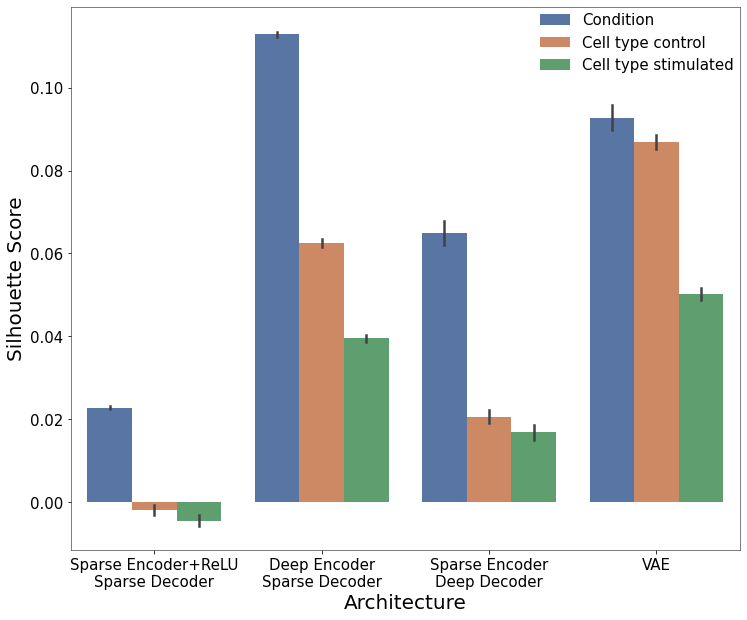

In [21]:
fig = plt.figure(figsize=[12,10])
bar = sns.barplot(x='Architecture', y='ASW', hue='Metric', data=rep_df, palette='deep', errwidth=2.5)
leg = plt.legend(borderaxespad=0., fontsize=15, frameon=False, markerscale=2)
plt.xlabel('Architecture', fontsize=20)
plt.ylabel('Silhouette Score', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.savefig('../paper/figures/fig-supp-arch-asw.pdf', format='pdf', dpi=300, bbox_inches='tight')

### Figure loss

In [14]:
def box_plot(data, edge_color, fill_color):
    bp = ax.boxplot(data, patch_artist=True)
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)

In [15]:
cv_res_shal_e_shal_d = np.load('../trained_models/experiment_1007/10CV_pos_weight_relu_drop05.npy', allow_pickle=True).item()
cv_res_deep_e_shal_d = np.load('../trained_models/deep_vae_cv/10CV_deep_norelu_drop05_pos_dec.npy', allow_pickle=True).item()
cv_res_shal_e_deep_d = np.load('../trained_models/inverted_vae/10CV_deep_inverted_drop0.5_posenc.npy', allow_pickle=True).item()
cv_res_deep_e_deep_d = np.load('../trained_models/deep_vanilla_vae/10CV_deep_vanilla_drop05.npy', allow_pickle=True).item()

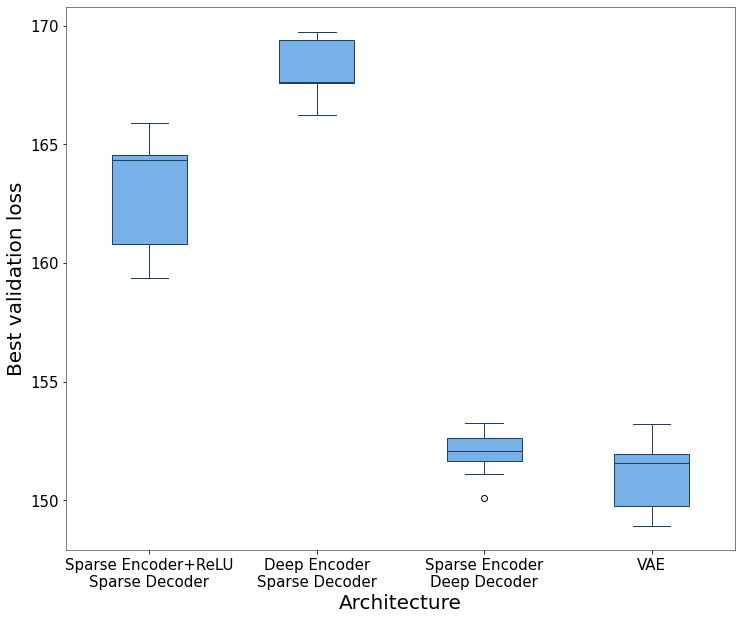

In [22]:
mat_loss= np.array([[v['best_valid_loss'] for v in cv_res_shal_e_shal_d.values()],
                    [v['best_valid_loss'] for v in cv_res_deep_e_shal_d.values()],
                    [v['best_valid_loss'] for v in cv_res_shal_e_deep_d.values()],
                    [v['best_valid_loss'] for v in cv_res_deep_e_deep_d.values()]])
fig, ax = plt.subplots(figsize=[12,10])
box_plot(mat_loss.T, '#1f4161', '#78b0e8')
plt.xlabel('Architecture', fontsize=20)
plt.ylabel('Best validation loss', fontsize=20)
plt.tick_params(labelsize=15)
ticks = plt.xticks(ticks=np.arange(1,5),
                   labels=['Sparse Encoder+ReLU\nSparse Decoder', 'Deep Encoder\nSparse Decoder', 'Sparse Encoder\nDeep Decoder', 'VAE']
                   , fontsize=15)
#plt.savefig('../paper/figures/fig-supp-arch-loss.pdf', format='pdf', dpi=300, bbox_inches='tight')